In [4]:
# These are the packages I'll be using.
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#from utils import make_meshgrid, plot_contours
from math import e
import pandas as pd
%matplotlib inline
np.random.seed(42) 

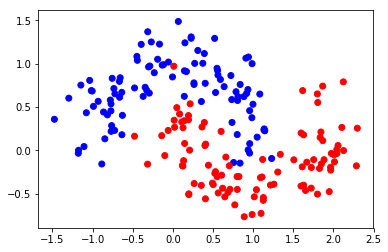

In [5]:
moons = make_moons(n_samples=200, noise=.2)  # you can experiment with more or less noise here if you'd like
X, y = moons

# plotting this dataset, positive examples will be red.
colors=['r' if item == 1 else 'b' for item in y]
plt.scatter(X[:,0], X[:,1], c=colors, cmap=plt.cm.coolwarm)
plt.show()

In [6]:
# Each row of the dataset has two featurs, x_1 and x_2.  Here are the first 5 rows.
X[0:5,:]

array([[-1.10689665e+00,  4.22928095e-02],
       [ 9.56799641e-01,  4.56750492e-01],
       [ 7.33516277e-01,  5.84617437e-01],
       [ 1.11140659e+00, -3.09213987e-01],
       [ 2.09081764e-01,  6.56679495e-04]])

In [7]:
# Each y can be either a 0 or 1.  Here are the first 5 Ys
y[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [8]:
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
print("Logit Accuracy: {0}%".format(accuracy_score(y, lr.predict(X)) * 100))
xx,yy = make_meshgrid(X,y)
plot_contours(lr, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:,0], X[:,1], c=colors, cmap=plt.cm.coolwarm)


Logit Accuracy: 85.5%


NameError: name 'make_meshgrid' is not defined

In [10]:
def  sigmoid(z):
         return 1/(1+e**-z)

In [11]:
def initialize_parameters(num_input_features, num_hidden_layer_neurons, num_output_neurons):    
    W1 = np.random.randn(num_hidden_layer_neurons, num_input_features) * 0.01
    b1 = np.zeros((num_hidden_layer_neurons, 1))
    W2 = np.random.randn(num_output_neurons, num_hidden_layer_neurons) * 0.01
    b2 = np.zeros((num_output_neurons, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [12]:
def forward_propagation(X, parameters, i=0):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    if i == 1:
        print("Homework Q1:")
        print('Matrix shape W1:' + str(W1.shape))
        print('Matrix shape b1:' + str(b1.shape))
        print('Matrix shape W2:' + str(W2.shape))
        print('Matrix shape b2:' + str(b2.shape))
        print('Matrix shape Z1:' + str(Z1.shape))
        print('Matrix shape A1:' + str(A1.shape))
        print('Matrix shape Z2:' + str(Z2.shape))
        print('Matrix shape A2:' + str(A2.shape))
    
    return A2, cache

In [13]:
def compute_cost(y_hat, y, parameters):
    m = y.shape[1] # number of examples
    logprobs = np.dot(np.log(y_hat), y.T) + np.dot(np.log(1-y_hat), (1 - y).T)
    cost = -1/m * np.sum(logprobs)    
    cost = np.squeeze(cost)
    return cost

In [48]:
def backward_propagation(parameters, cache, X, y, i):
    m = X.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']

    dZ2= A2 - y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2)  * (1 - np.power(A1, 2))
    dW1 =  1/m * np.dot(dZ1,X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    
    if i == 1:
        print("Homework Q2:")
        print('Matrix shape dZ2:' + str(dZ2.shape))
        print('Matrix shape dW2:' + str(dW2.shape))
        print('Matrix shape db2:' + str(db2.shape))
        print('Matrix shape dZ1:' + str(dZ1.shape))
        print('Matrix shape dW1:' + str(dW1.shape))
        print('Matrix shape db1:' + str(db1.shape))
        print("Homework Q3: A2 is output, X is input. In order to adjust the each neurons weights' error during backprop w.r.t. the output error. A neuron's gradient from output back to input is used to adjust weights of the respective neuron.")
        print(db1.shape[0] + dW2.shape[0] + db2.shape[0] + dZ1.shape[0] + dW1.shape[0] +db1.shape[0])
        print("HW Q4: 33")
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [49]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [50]:
def train_network(X, y, hidden_layer_size, num_iterations = 10000, print_cost=False):
    y=y.reshape(-1,1).T
    X=X.T
    parameters = initialize_parameters(X.shape[0], hidden_layer_size, 1)
    costs=[]
    paramCount = 0
    for index in parameters:
        print(str(index))
        print(str(parameters[index].shape))
    
    for i in range(0, num_iterations):
        y_hat, cache = forward_propagation(X, parameters, i)
        cost = compute_cost(y_hat, y, parameters)
        costs.append(cost) # keep a log of costs, so we can visualize it later
        grads = backward_propagation(parameters, cache, X, y, i)
        parameters = update_parameters(parameters, grads)

        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    return costs, parameters

In [51]:
costs, parameters = train_network(X,y,10, num_iterations=30000, print_cost=True)

W1
(10, 2)
b1
(10, 1)
W2
(1, 10)
b2
(1, 1)
Cost after iteration 0: 0.693066
Homework Q1:
Matrix shape W1:(10, 2)
Matrix shape b1:(10, 1)
Matrix shape W2:(1, 10)
Matrix shape b2:(1, 1)
Matrix shape Z1:(10, 200)
Matrix shape A1:(10, 200)
Matrix shape Z2:(1, 200)
Matrix shape A2:(1, 200)
Homework Q2:
Matrix shape dZ2:(1, 200)
Matrix shape dW2:(1, 10)
Matrix shape db2:(1, 1)
Matrix shape dZ1:(10, 200)
Matrix shape dW1:(10, 2)
Matrix shape db1:(10, 1)
Homework Q3: A2 is output, X is input. In order to adjust the each neurons weights' error during backprop w.r.t. the output error. A neuron's gradient from output back to input is used to adjust weights of the respective neuron.
10
HW Q4: 33
Cost after iteration 1000: 0.095077
Cost after iteration 2000: 0.058398
Cost after iteration 3000: 0.048812
Cost after iteration 4000: 0.043412
Cost after iteration 5000: 0.037964
Cost after iteration 6000: 0.033363
Cost after iteration 7000: 0.029549
Cost after iteration 8000: 0.026442
Cost after iteratio

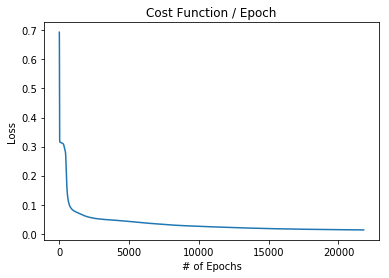

In [43]:
#Examining the cost function at each epoch will show us how well our network is learning.
plt.title("Cost Function / Epoch")
ax=pd.Series(costs).plot()
ax.set_xlabel("# of Epochs")
ax.set_ylabel("Loss")
plt.show()

In [19]:
def predict(parameters, X):
    X = X.T
    y_hat, cache = forward_propagation(X, parameters)
    predictions = (y_hat > 0.5)    
    return predictions.T

In [20]:
y_hat = predict(parameters, X)

In [21]:
print("MLP Accuracy: {0}%".format(accuracy_score(y, y_hat) * 100))
xx,yy = make_meshgrid(X,y)

Z = predict(parameters, np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
out = plt.contourf(xx, yy, Z,cmap=plt.cm.coolwarm)
plt.scatter(X[:,0], X[:,1], c=colors, cmap=plt.cm.coolwarm)
plt.show()

MLP Accuracy: 100.0%


NameError: name 'make_meshgrid' is not defined

In [ ]:
HW Q4: How many parametrs does the NN we built have?
    input: 0
    hidden1: 
    final: 